In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import random
import time
from tqdm import tqdm
from torchvision import transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from data import ChristmasImages
from torchvision.datasets import ImageFolder
from model import Network

#To calculate mean and std_dev of training dataset

path = 'image_data'
train_transform = transforms.Compose([
            transforms.Resize((224,224)),
            transforms.CenterCrop(192),
            transforms.RandomRotation(degrees = (-180,180)),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            #transforms.Normalize(mean= torch.tensor([0.4585, 0.4114, 0.3843]),std = torch.tensor([0.3152, 0.3112, 0.3195])),
            ])
image_data_unnormalized = ImageFolder(root = path + '/train', transform = train_transform)
loader = DataLoader(image_data_unnormalized,batch_size = len(image_data_unnormalized),num_workers = 6)

images,labels = next(iter(loader))

mean,std = images.mean([0,2,3]),images.std([0,2,3])

print (mean,std)
 

In [41]:
train_path = 'image_data'
train_dataset = ChristmasImages(train_path,training = True)
train_dataset[0]

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

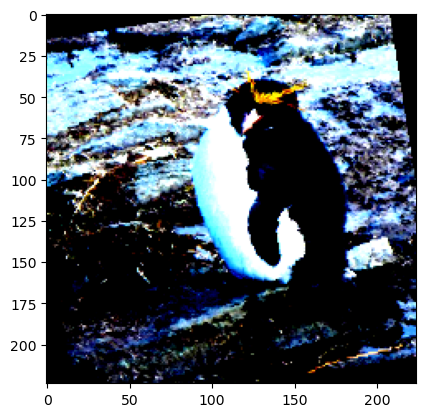

In [26]:
rand_idx = random.randrange(0,3725,1)
image,label = dataset[rand_idx]
#print(len(val_data))
print(image,label)
plt.imshow(image.permute(1,2,0))


In [18]:
batch_size = 32
val_size = int(0.2*len(dataset))
train_size = len(dataset) - val_size
print(val_size,train_size)

745 2981


In [22]:
train_ds,val_ds = random_split(dataset,[train_size,val_size])

In [23]:
train_dl = DataLoader(train_ds, batch_size, shuffle = True, num_workers = 6)
val_dl = DataLoader(val_ds, batch_size,shuffle = True, num_workers = 6)

In [24]:
from torchsummary import summary 
mymodel = Network()
#new_model.freeze_parameters()
summary(mymodel,(3,224,224))

Loaded pretrained weights for efficientnet-b0
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         ZeroPad2d-1          [-1, 3, 225, 225]               0
Conv2dStaticSamePadding-2         [-1, 32, 112, 112]             864
       BatchNorm2d-3         [-1, 32, 112, 112]              64
MemoryEfficientSwish-4         [-1, 32, 112, 112]               0
         ZeroPad2d-5         [-1, 32, 114, 114]               0
Conv2dStaticSamePadding-6         [-1, 32, 112, 112]             288
       BatchNorm2d-7         [-1, 32, 112, 112]              64
MemoryEfficientSwish-8         [-1, 32, 112, 112]               0
          Identity-9             [-1, 32, 1, 1]               0
Conv2dStaticSamePadding-10              [-1, 8, 1, 1]             264
MemoryEfficientSwish-11              [-1, 8, 1, 1]               0
         Identity-12              [-1, 8, 1, 1]               0
Conv2dStaticSamePadding-13        

In [25]:
learning_rate = 0.001
optimizer = torch.optim.Adam(mymodel.parameters(),lr = 0.001,weight_decay = 0.0001)
#optimizer = torch.optim.SGD(new_model.parameters(), lr = 3e-4,weight_decay = 0.9)
loss_function = nn.CrossEntropyLoss()
num_epochs = 30
patience = 2
min_lr = 3e-4
best_val_acc = 0
no_improvements_epochs = 0

In [37]:
optimizer = torch.optim.Adam(mymodel.parameters(),lr = 0.01,weight_decay = 0.0001)
best_val_acc = 0
num_epochs = 10

In [38]:
for epoch in range(num_epochs):
    total_train_loss = 0
    train_correct = 0
    train_total = 0
    
    time_start = time.time()
    with tqdm(train_dl, unit = "batch", desc = f"Epoch {epoch+1}") as tepoch:
        # Training step
        trained_model.train()
        for data, target in tepoch:
            optimizer.zero_grad()
            output = trained_model(data)
            loss = loss_function(output, target)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            train_total += target.size(0)
            train_correct += (predicted == target).sum().item()
        train_acc = train_correct / train_total
        train_loss = total_train_loss / len(train_dl)
        tepoch.set_postfix(loss = train_loss, acc = train_acc)
        
    # Evaluation step
    with torch.no_grad():
        trained_model.eval()
        total_val_loss = 0
        val_correct = 0
        val_total = 0
        for data, target in val_dl:
            output = trained_model(data)
            val_loss = loss_function(output, target)
            total_val_loss += val_loss.item()
            _, predicted = torch.max(output.data, 1)
            val_total += target.size(0)
            val_correct += (predicted == target).sum().item()
        val_acc = val_correct / val_total
        val_loss = total_val_loss / len(val_dl)
        if val_acc>best_val_acc:
            best_val_acc = val_acc
            best_weights = trained_model.state_dict()
            torch.save(best_weights, 'best_weights.pth')
            trained_model.save_model()
 
        
    time_end = time.time()
    time_elapsed = time_end - time_start
    print("Time_elapsed for Epoch [{}] : [{:.2f}] s".format(epoch+1,time_elapsed))
    print(f'Training Loss: {train_loss:.4f} | Train Acc: {100*train_acc:.4f}')
    print(f'Validation Loss: {val_loss:.4f} | Validation Acc: {100*val_acc:.4f} | Best Validation Acc: {100*best_val_acc:.4f}')
        

Epoch 1: 100%|██████████████████████████████████████████████████████████████████████| 94/94 [03:20<00:00,  2.13s/batch]


Time_elapsed for Epoch [1] : [255.84] s
Training Loss: 0.3232 | Train Acc: 89.8021
Validation Loss: 0.4661 | Validation Acc: 85.5034 | Best Validation Acc: 85.5034


Epoch 2: 100%|██████████████████████████████████████████████████████████████████████| 94/94 [03:19<00:00,  2.13s/batch]


Time_elapsed for Epoch [2] : [254.83] s
Training Loss: 0.3293 | Train Acc: 89.8021
Validation Loss: 0.4465 | Validation Acc: 85.7718 | Best Validation Acc: 85.7718


Epoch 3: 100%|██████████████████████████████████████████████████████████████████████| 94/94 [03:28<00:00,  2.22s/batch]


Time_elapsed for Epoch [3] : [268.55] s
Training Loss: 0.3027 | Train Acc: 90.7078
Validation Loss: 0.4638 | Validation Acc: 84.9664 | Best Validation Acc: 85.7718


Epoch 4: 100%|██████████████████████████████████████████████████████████████████████| 94/94 [03:25<00:00,  2.19s/batch]


Time_elapsed for Epoch [4] : [263.42] s
Training Loss: 0.3124 | Train Acc: 89.6008
Validation Loss: 0.4719 | Validation Acc: 84.4295 | Best Validation Acc: 85.7718


Epoch 5: 100%|██████████████████████████████████████████████████████████████████████| 94/94 [03:31<00:00,  2.25s/batch]


Time_elapsed for Epoch [5] : [268.90] s
Training Loss: 0.3179 | Train Acc: 90.5736
Validation Loss: 0.4719 | Validation Acc: 84.1611 | Best Validation Acc: 85.7718


Epoch 6: 100%|██████████████████████████████████████████████████████████████████████| 94/94 [03:26<00:00,  2.19s/batch]


Time_elapsed for Epoch [6] : [263.39] s
Training Loss: 0.3062 | Train Acc: 90.9091
Validation Loss: 0.4718 | Validation Acc: 85.3691 | Best Validation Acc: 85.7718


Epoch 7: 100%|██████████████████████████████████████████████████████████████████████| 94/94 [03:29<00:00,  2.23s/batch]


Time_elapsed for Epoch [7] : [266.96] s
Training Loss: 0.3039 | Train Acc: 90.6072
Validation Loss: 0.4767 | Validation Acc: 86.4430 | Best Validation Acc: 86.4430


Epoch 8: 100%|██████████████████████████████████████████████████████████████████████| 94/94 [03:26<00:00,  2.20s/batch]


Time_elapsed for Epoch [8] : [264.73] s
Training Loss: 0.3117 | Train Acc: 90.1375
Validation Loss: 0.4738 | Validation Acc: 84.5638 | Best Validation Acc: 86.4430


Epoch 9: 100%|██████████████████████████████████████████████████████████████████████| 94/94 [03:30<00:00,  2.24s/batch]


Time_elapsed for Epoch [9] : [268.99] s
Training Loss: 0.3100 | Train Acc: 90.3053
Validation Loss: 0.4780 | Validation Acc: 84.0268 | Best Validation Acc: 86.4430


Epoch 10: 100%|█████████████████████████████████████████████████████████████████████| 94/94 [03:24<00:00,  2.18s/batch]


Time_elapsed for Epoch [10] : [261.25] s
Training Loss: 0.3154 | Train Acc: 89.9027
Validation Loss: 0.4520 | Validation Acc: 84.1611 | Best Validation Acc: 86.4430


In [33]:
trained_model = Network()
trained_model.load_state_dict(torch.load('model'))

Loaded pretrained weights for efficientnet-b0


<All keys matched successfully>